<a href="https://colab.research.google.com/github/hvauchar/How-to-Win-a-Data-Science-Competition-Learn-from-Top-Kagglers-Final-project/blob/master/Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
from multiprocessing import Pool
import xgboost as xgb
from itertools import product
import pickle
import tensorflow as tf
from tensorflow.keras import layers

InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [0]:
test = pd.read_csv('data/test.csv')
X_train = pd.read_csv('data/X_train.csv')
X_cv = pd.read_csv('data/X_cv.csv')
X_test = pd.read_csv('data/X_test.csv')

In [86]:
X_test.shape,test.shape

((428400, 16), (214200, 3))

In [0]:
cols = [c for c in X_train.columns if c not in ['date_block_num', 'item_cnt_day','item_category_name']]

x1 = X_train[cols]
y1 = X_train['item_cnt_day']
x2 = X_cv[cols]
y2 = X_cv['item_cnt_day']

In [21]:
x1.head()
x1.shape, y1.shape

,shop_id,item_id,item_category_id,item_id_avg_item_price_lag_1,item_id_sum_item_cnt_day_lag_1,item_id_avg_item_cnt_day_lag_1,shop_id_avg_item_price_lag_1,shop_id_sum_item_cnt_day_lag_1,shop_id_avg_item_cnt_day_lag_1,item_category_id_avg_item_price_lag_1,item_category_id_sum_item_cnt_day_lag_1,item_category_id_avg_item_cnt_day_lag_1,item_cnt_day_lag_1
0,27,15242,63,131.152174,9.0,0.195652,183.18482,5451.0,0.721891,108.913511,1295.0,0.230756,1.0
1,27,15200,69,10.847826,1.0,0.021739,183.18482,5451.0,0.721891,53.044176,1036.0,0.341238,0.0
2,27,15279,63,399.210507,48.0,1.043478,183.18482,5451.0,0.721891,108.913511,1295.0,0.230756,2.0
3,27,15202,69,10.847826,2.0,0.043478,183.18482,5451.0,0.721891,53.044176,1036.0,0.341238,0.0
4,27,14888,55,214.826087,21.0,0.456522,183.18482,5451.0,0.721891,42.582102,10216.0,0.204124,2.0


((5839576, 13), (5839576,))

In [0]:
model = tf.keras.Sequential([
  layers.Dense(14, activation='relu',input_shape=[len(x1.keys())]),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae', 'mse'])

In [45]:
t1 = tf.convert_to_tensor(x1[:9].values.astype(float))
model.predict(t1)

array([[-117.858765],
       [-119.21745 ],
       [-154.87543 ],
       [-119.15349 ],
       [  70.71213 ],
       [-170.42786 ],
       [-740.2134  ],
       [ 160.99768 ],
       [-213.28069 ]], dtype=float32)

In [48]:
EPOCHS = 4 
history = model.fit(x1, y1, epochs=EPOCHS,batch_size=64,validation_data=(x2,y2))

Epoch 1/4
91244/91244 [==============================] - 156s 2ms/step - loss: 1.8888 - mae: 0.4889 - mse: 1.8888 - val_loss: 1.6506 - val_mae: 0.4054 - val_mse: 1.6509
Epoch 2/4
91244/91244 [==============================] - 157s 2ms/step - loss: 1.5290 - mae: 0.4237 - mse: 1.5290 - val_loss: 1.5056 - val_mae: 0.3665 - val_mse: 1.5059
Epoch 3/4
91244/91244 [==============================] - 159s 2ms/step - loss: 1.4176 - mae: 0.4108 - mse: 1.4176 - val_loss: 1.4775 - val_mae: 0.3894 - val_mse: 1.4778
Epoch 4/4
91244/91244 [==============================] - 154s 2ms/step - loss: 1.3974 - mae: 0.4049 - mse: 1.3975 - val_loss: 1.4559 - val_mae: 0.3850 - val_mse: 1.4562


dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


Text(0.5, 1.0, 'model loss')

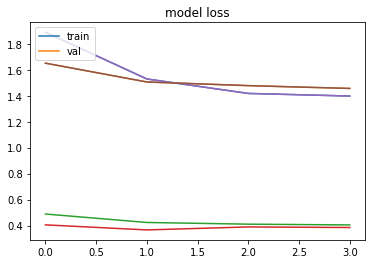

In [60]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [67]:
submission = pd.read_csv('data/sample_submission.csv')
submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [81]:
op = pd.DataFrame(data=yhat,columns=['item_cnt_month'])
op.index.name = 'ID'
op.shape

(428400, 1)

In [0]:
op.to_csv('data/op.csv')

In [78]:
ophat = pd.read_csv('data/op.csv')
ophat.head()

,ID,item_cnt_month
0,0,0.173687
1,1,0.162968
2,2,0.587251
3,3,0.172155
4,4,0.162968
